# **PROJETO MÉDIA MÓVEL**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## **Análise e Tratamento Inicial**

tratamento dos dados estatísticos 

In [75]:
covid = pd.read_csv('dados_covid_sp.csv',
                    sep=';')

https://www.seade.gov.br/coronavirus/#

https://github.com/seade-R/dados-covid-sp

https://www.seade.gov.br/


In [76]:
covid.head(20)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
5,Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,5931,1106,40446,0,8.0,"-22,8812","-49,2421",9
6,Águas de São Pedro,3500600,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
7,Agudos,3500709,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,36134,5524,96671,0,8.0,"-22,4694","-48,9863",9
8,Alambari,3500758,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Sorocaba,6,5779,830,1596,0,8.0,"-23,5503","-47,8980",9
9,Alfredo Marcondes,3500808,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Presidente Prudente,2,3927,907,11892,0,8.0,"-21,9527","-51,4140",9


26 variáveis e mais de 300 mil registros 

In [77]:
print('linha', 'coluna')
covid.shape

linha coluna


(323000, 26)

In [78]:
list(covid.columns)

['nome_munic',
 'codigo_ibge',
 'dia',
 'mes',
 'datahora',
 'casos',
 'casos_novos',
 'casos_pc',
 'casos_mm7d',
 'obitos',
 'obitos_novos',
 'obitos_pc',
 'obitos_mm7d',
 'letalidade',
 'nome_ra',
 'cod_ra',
 'nome_drs',
 'cod_drs',
 'pop',
 'pop_60',
 'area',
 'map_leg',
 'map_leg_s',
 'latitude',
 'longitude',
 'semana_epidem']

## casos_mm7d = casos média móvel 7 dias

obitos_mm7d = obitos média móvel 7 dias

Dados que vamos usar  na análise:

  - datahora

 - casos_novos
 - casos_mm7d
 - obitos_novos
 - obitos_mm7d



verificar os reconhecimentos das variáveis


In [79]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

datahora será ajustado como datetime mais futuramente

casos novos e óbitos são dados inteiros

a média móvel de 7 dias dessas variáveis serão ajustadas como dados inteiros.

os casos em mm7d estão em ,, vou ter que alterar, para depois transformar nos tipos de números corretos.

In [80]:
# Substituir as vírgulas por pontos
covid['casos_mm7d'] = covid['casos_mm7d'].str.replace(',', '.')
covid

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322995,Ignorado,9999999,4,7,2021-07-04,994,-41,"0,00000000000000e+00",1.857142857142857,58,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322996,Ignorado,9999999,5,7,2021-07-05,971,-23,"0,00000000000000e+00",3.714285714285714,51,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322997,Ignorado,9999999,6,7,2021-07-06,965,-6,"0,00000000000000e+00",-14.428571428571429,8,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322998,Ignorado,9999999,7,7,2021-07-07,993,28,"0,00000000000000e+00",5.285714285714286,10,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27


transformação para uma variável numérica

In [81]:
# Transformar String em variável numérica
covid['casos_mm7d'] = pd.to_numeric(covid['casos_mm7d'])

In [82]:
covid['obitos_mm7d'] = covid['obitos_mm7d'].str.replace(',', '.')
covid

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322995,Ignorado,9999999,4,7,2021-07-04,994,-41,"0,00000000000000e+00",1.857143,58,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322996,Ignorado,9999999,5,7,2021-07-05,971,-23,"0,00000000000000e+00",3.714286,51,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322997,Ignorado,9999999,6,7,2021-07-06,965,-6,"0,00000000000000e+00",-14.428571,8,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322998,Ignorado,9999999,7,7,2021-07-07,993,28,"0,00000000000000e+00",5.285714,10,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27


In [83]:
covid['obitos_mm7d'] = pd.to_numeric(covid['obitos_mm7d'])

casos_mm7d       float64


obitos_mm7d      float64


In [84]:
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d      float64
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

In [85]:
covid.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [86]:
covid.shape

(323000, 26)

## Verificando se há dados faltantes 

Valores Missing (NAN)

In [87]:
# RELAÇÃO DA QUANTIDADE
covid.isnull().sum()

nome_munic         0
codigo_ibge        0
dia                0
mes                0
datahora           0
casos              0
casos_novos        0
casos_pc           0
casos_mm7d         0
obitos             0
obitos_novos       0
obitos_pc          0
obitos_mm7d        0
letalidade         0
nome_ra          500
cod_ra             0
nome_drs         500
cod_drs            0
pop                0
pop_60             0
area               0
map_leg          500
map_leg_s        500
latitude           0
longitude          0
semana_epidem      0
dtype: int64

In [88]:
covid['obitos'].isnull().sum()

0

## exemplo 2, substituir os dados faltantes por 0

In [89]:
# Substituir valores missing por zero
covid2 = covid.fillna(0)

In [90]:
covid2.isnull().sum()

nome_munic       0
codigo_ibge      0
dia              0
mes              0
datahora         0
casos            0
casos_novos      0
casos_pc         0
casos_mm7d       0
obitos           0
obitos_novos     0
obitos_pc        0
obitos_mm7d      0
letalidade       0
nome_ra          0
cod_ra           0
nome_drs         0
cod_drs          0
pop              0
pop_60           0
area             0
map_leg          0
map_leg_s        0
latitude         0
longitude        0
semana_epidem    0
dtype: int64

In [91]:
covid2.shape

(323000, 26)

### Excluir os valores ausentes 

In [92]:
# EXCLUIR TODOS OS VALORES MISSING
covid3 = covid.dropna()

In [93]:
covid3.shape

(322500, 26)

In [94]:
covid2.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d      float64
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

## faremos a filtragem dos dados em um município específico, para entrar nas analises. 

Depois iremos trabalhar com algumas variáveis em especial

nos dados abaixo, que já vem a média móvel, verifica-se que é uma média móvel simples, não a centralizada.

In [95]:
covid_sp = covid2.loc[covid2.nome_munic == 'São Paulo']
covid_sp.head(8)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10


Faremos futuramente o estudo da média simples e centralizada. Mas, a centralizada será o mais interessante.

## **Média Móvel Casos Novos**

In [96]:
covid_sp.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5722,São Paulo,3550308,4,3,2020-03-04,3,1,"2,52745234488604e-02",0.285714,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
6367,São Paulo,3550308,5,3,2020-03-05,6,3,"5,05490468977207e-02",0.714286,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10


In [97]:
covid_sp.tail(9)


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
317257,São Paulo,3550308,30,6,2021-06-30,855163,1226,"7,20461243203259e+03",2003.142857,33510,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",26
317902,São Paulo,3550308,1,7,2021-07-01,857318,2155,"7,22276796471002e+03",1909.857143,33603,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",26
318547,São Paulo,3550308,2,7,2021-07-02,859731,2413,"7,24309710640406e+03",1820.571429,33713,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",26
319192,São Paulo,3550308,3,7,2021-07-03,862385,2654,"7,26545663481515e+03",1841.000000,33798,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",26
319837,São Paulo,3550308,4,7,2021-07-04,863091,706,"7,27140457266678e+03",1785.428571,33806,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
320482,São Paulo,3550308,5,7,2021-07-05,863581,490,"7,27553274483010e+03",1774.285714,33820,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
321127,São Paulo,3550308,6,7,2021-07-06,866200,2619,"7,29759740380095e+03",1751.857143,33956,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
321772,São Paulo,3550308,7,7,2021-07-07,868384,2184,"7,31599725687172e+03",1888.714286,34044,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
322417,São Paulo,3550308,8,7,2021-07-08,870614,2230,"7,33478465263538e+03",1899.428571,34163,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27


In [98]:
#Dados de 25/02/2020 à 08/07/2021

covid_sp.sort_values(by='datahora', ascending=False)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
322417,São Paulo,3550308,8,7,2021-07-08,870614,2230,"7,33478465263538e+03",1899.428571,34163,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
321772,São Paulo,3550308,7,7,2021-07-07,868384,2184,"7,31599725687172e+03",1888.714286,34044,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
321127,São Paulo,3550308,6,7,2021-07-06,866200,2619,"7,29759740380095e+03",1751.857143,33956,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
320482,São Paulo,3550308,5,7,2021-07-05,863581,490,"7,27553274483010e+03",1774.285714,33820,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
319837,São Paulo,3550308,4,7,2021-07-04,863091,706,"7,27140457266678e+03",1785.428571,33806,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


In [99]:
print('linha = registros e colunas')
covid_sp.shape

linha = registros e colunas


(500, 26)

Plotando a média móvel de forma simples, que já está registrado

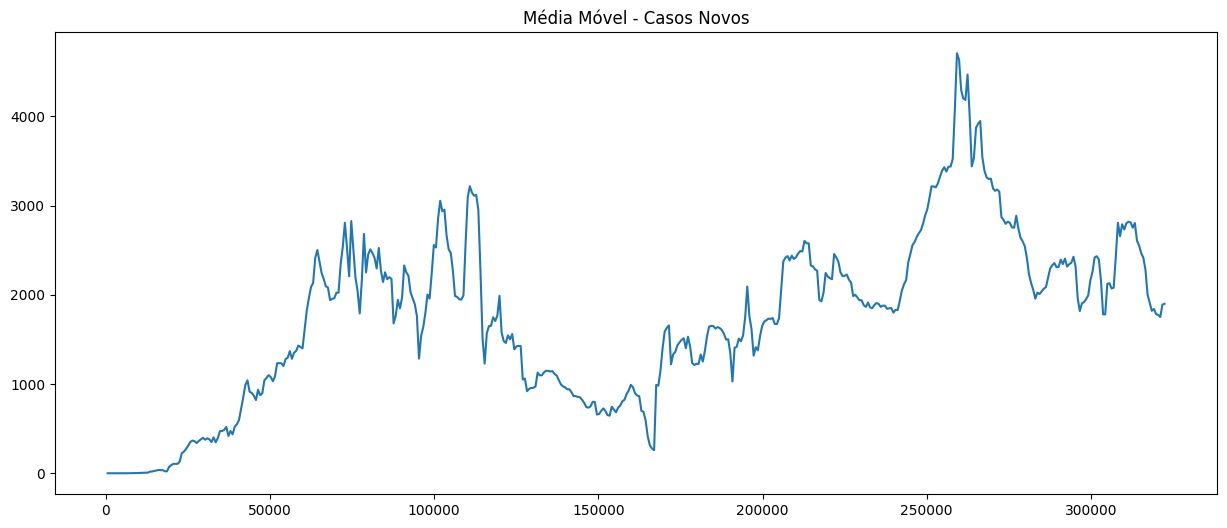

In [100]:
# Média móvel do Dataframe
plt.plot(covid_sp.casos_mm7d)
plt.title('Média Móvel - Casos Novos')
plt.grid(False)
plt.show()

In [101]:
serie = pd.Series(covid_sp['casos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       1
2020-02-29       0
              ... 
2021-07-04     706
2021-07-05     490
2021-07-06    2619
2021-07-07    2184
2021-07-08    2230
Length: 500, dtype: int64

# SÉRIE RELACIONADA AOS CASOS NOVOS 

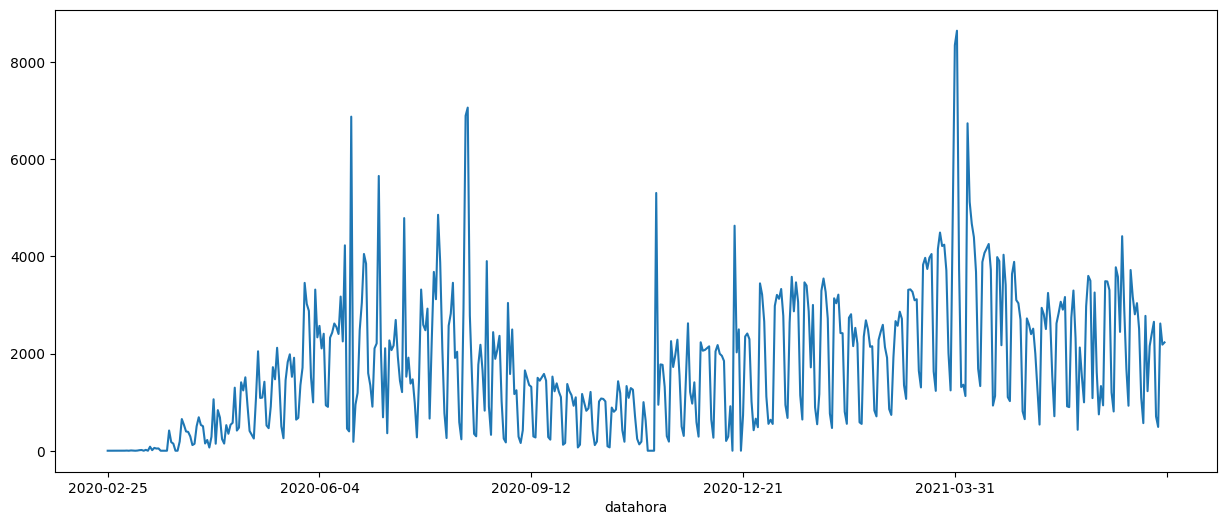

In [102]:
serie.plot();

In [103]:
# média de forma simples que retiram os primeiros 6 dias 
media_casos = serie.rolling(window=7)
media_casos = media_casos.mean()
media_casos

datahora
2020-02-25            NaN
2020-02-26            NaN
2020-02-27            NaN
2020-02-28            NaN
2020-02-29            NaN
                 ...     
2021-07-04    1785.428571
2021-07-05    1774.285714
2021-07-06    1751.857143
2021-07-07    1888.714286
2021-07-08    1899.428571
Length: 500, dtype: float64

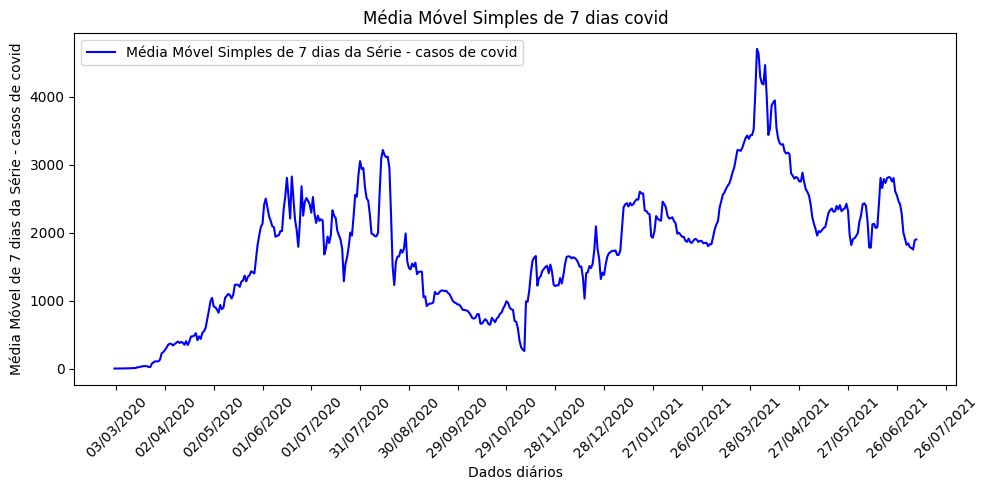

In [104]:
import matplotlib.dates as mdates



# Certificando-se de que o índice é uma série temporal (caso não esteja), formatando a data
if not pd.api.types.is_datetime64_any_dtype(media_casos.index):
    media_casos.index = pd.to_datetime(media_casos.index, format='%Y-%m-%d')  # Converte para ano-mês



# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
#plt.plot(serie, label="Série")
plt.plot(media_casos.index, media_casos.values, label='Média Móvel Simples de 7 dias da Série - casos de covid', color='blue')

# Adicionando um título ao gráfico
plt.title("Média Móvel Simples de 7 dias covid")

# Definindo rótulos dos eixos
plt.xlabel("Dados diários")
plt.ylabel("Média Móvel de 7 dias da Série - casos de covid")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=45)


# Formatando o eixo x para mostrar a cada 30 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Colocar um marcador a cada 30 dias
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Formatando para exibir ano e mês




# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()




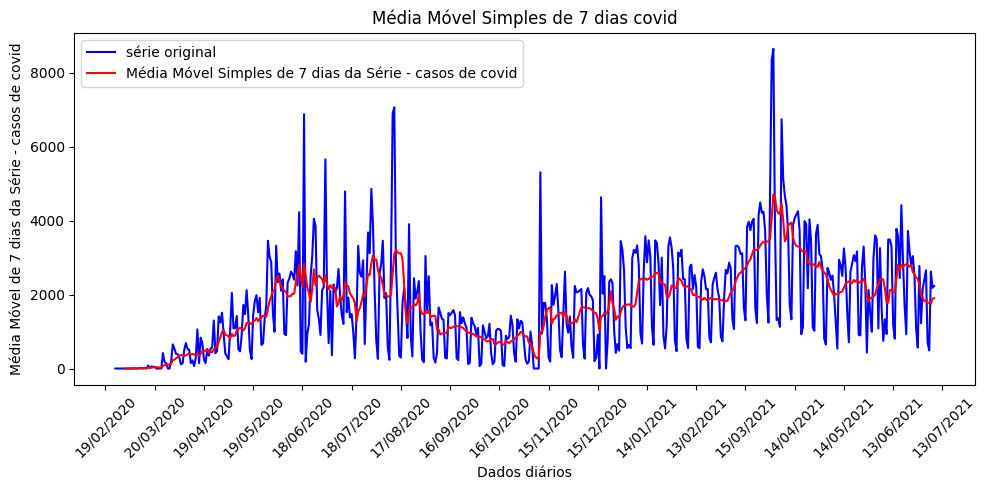

In [105]:
import matplotlib.dates as mdates



# Certificando-se de que o índice é uma série temporal (caso não esteja), formatando a data
if not pd.api.types.is_datetime64_any_dtype(serie.index):
    serie.index = pd.to_datetime(serie.index, format='%Y-%m-%d')  # Converte para ano-mês

if not pd.api.types.is_datetime64_any_dtype(media_casos.index):
    media_casos.index = pd.to_datetime(media_casos.index, format='%Y-%m-%d')  # Converte para ano-mês



# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série

# série original
plt.plot(serie.index, serie.values, label='série original', color='blue')

#plt.plot(serie, label="Série")
plt.plot(media_casos.index, media_casos.values, label='Média Móvel Simples de 7 dias da Série - casos de covid', color='red')




# Adicionando um título ao gráfico
plt.title("Média Móvel Simples de 7 dias covid")

# Definindo rótulos dos eixos
plt.xlabel("Dados diários")
plt.ylabel("Média Móvel de 7 dias da Série - casos de covid")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=45)


# Formatando o eixo x para mostrar a cada 30 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Colocar um marcador a cada 30 dias
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Formatando para exibir ano e mês




# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


# Vamos calcular a média móvel centralizada, que é a forma mais correta e coerente 

no caso, como é média central perderá 3 dias no final e 3 dias no início, se usar o período de 7 dias

In [106]:
media_casos = serie.rolling(window=7,center=True)
media_casos = media_casos.mean()

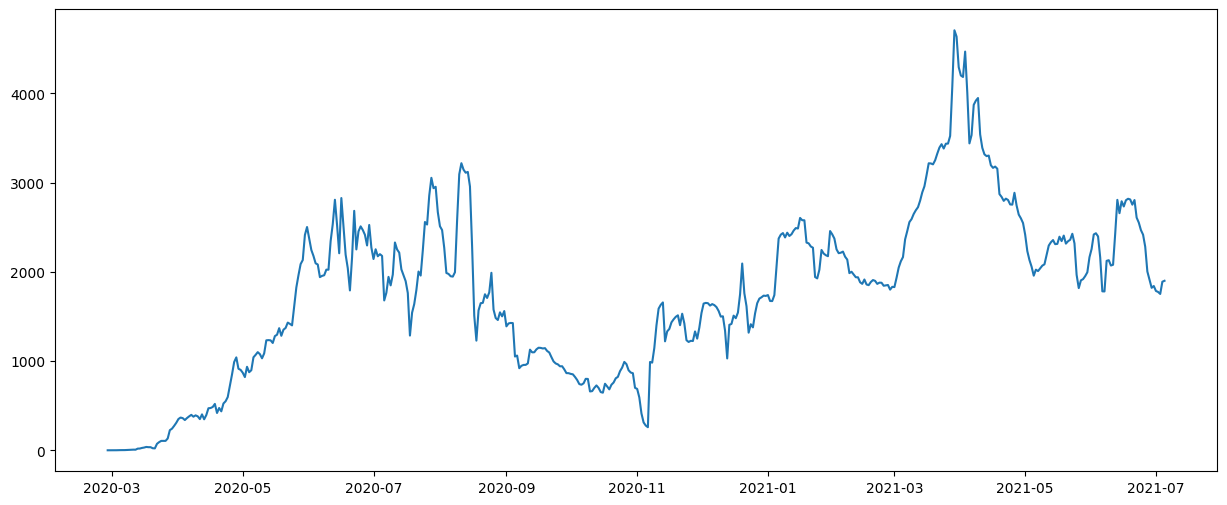

In [107]:
plt.plot(media_casos);

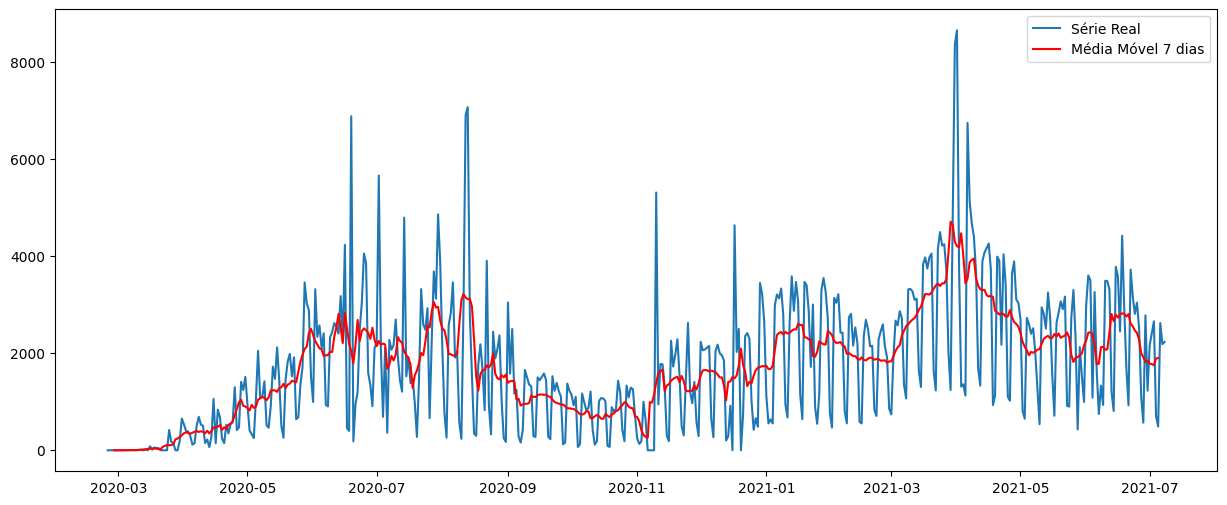

In [108]:
plt.plot(serie, label='Série Real')
plt.plot(media_casos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

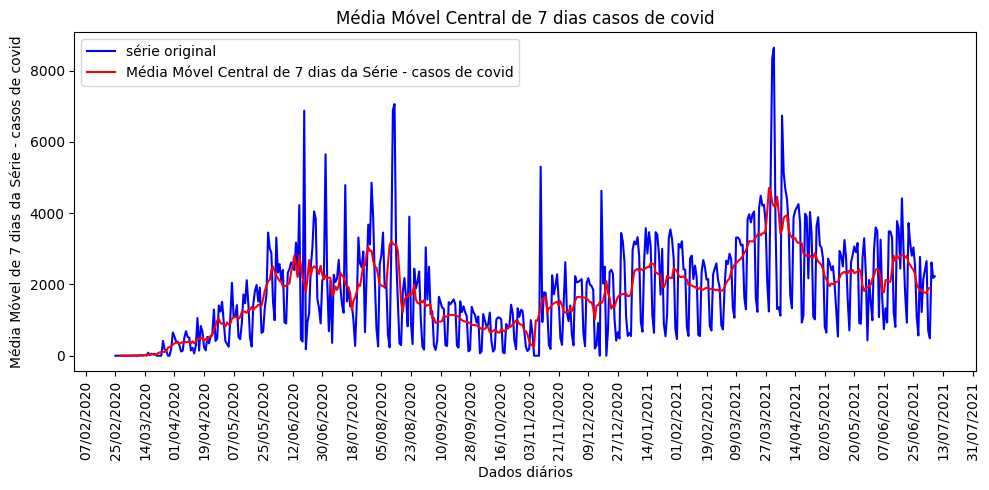

In [109]:
import matplotlib.dates as mdates



# Certificando-se de que o índice é uma série temporal (caso não esteja), formatando a data
if not pd.api.types.is_datetime64_any_dtype(serie.index):
    serie.index = pd.to_datetime(serie.index, format='%Y-%m-%d')  # Converte para ano-mês

if not pd.api.types.is_datetime64_any_dtype(media_casos.index):
    media_casos.index = pd.to_datetime(media_casos.index, format='%Y-%m-%d')  # Converte para ano-mês



# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série

# série original
plt.plot(serie.index, serie.values, label='série original', color='blue')

#plt.plot(serie, label="Série")
plt.plot(media_casos.index, media_casos.values, label='Média Móvel Central de 7 dias da Série - casos de covid', color='red')




# Adicionando um título ao gráfico
plt.title("Média Móvel Central de 7 dias casos de covid")

# Definindo rótulos dos eixos
plt.xlabel("Dados diários")
plt.ylabel("Média Móvel de 7 dias da Série - casos de covid")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=90)


# Formatando o eixo x para mostrar a cada 18 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=18))  # Colocar um marcador a cada 18 dias
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Formatando para exibir ano e mês




# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

na média móvel verificamos uma suavidade dos dados

In [110]:
media_casos

datahora
2020-02-25            NaN
2020-02-26            NaN
2020-02-27            NaN
2020-02-28       0.142857
2020-02-29       0.142857
                 ...     
2021-07-04    1888.714286
2021-07-05    1899.428571
2021-07-06            NaN
2021-07-07            NaN
2021-07-08            NaN
Length: 500, dtype: float64

## **Média Móvel Óbitos Novos**

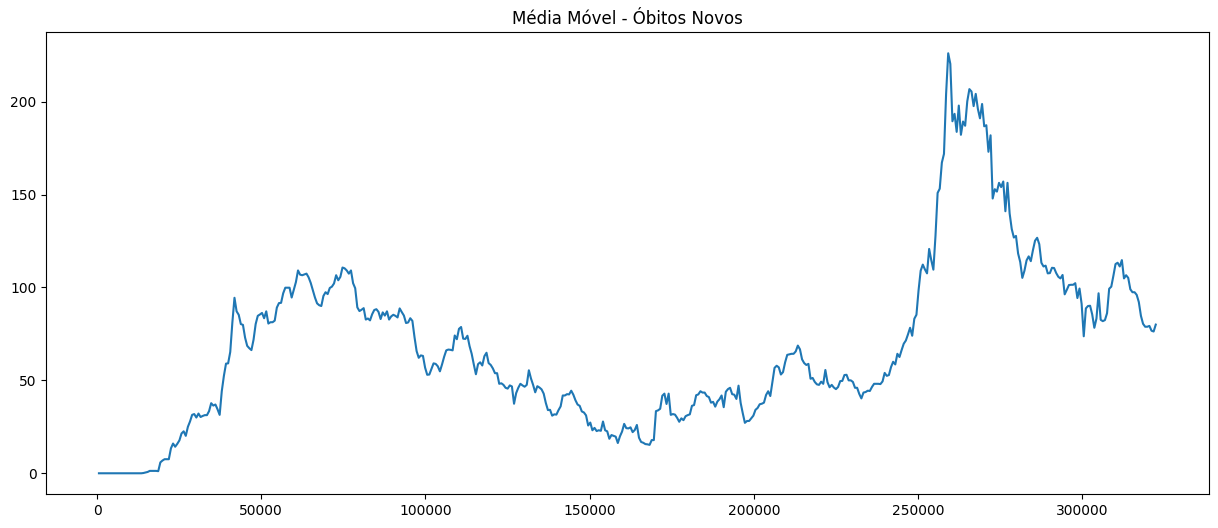

In [111]:
# Média móvel do Dataframe
plt.plot(covid_sp.obitos_mm7d)
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

In [112]:
serie = pd.Series(covid_sp['obitos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2021-07-04      8
2021-07-05     14
2021-07-06    136
2021-07-07     88
2021-07-08    119
Length: 500, dtype: int64

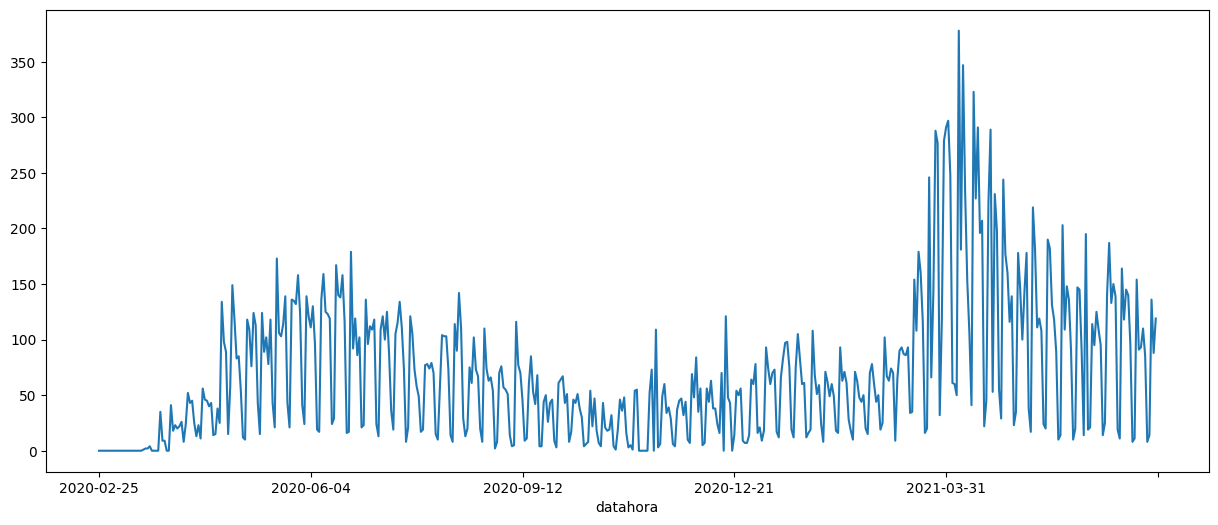

In [113]:
serie.plot();

In [114]:
media_obitos = serie.rolling(window=7, center=True)
media_obitos = media_obitos.mean()

média móvel centralizada

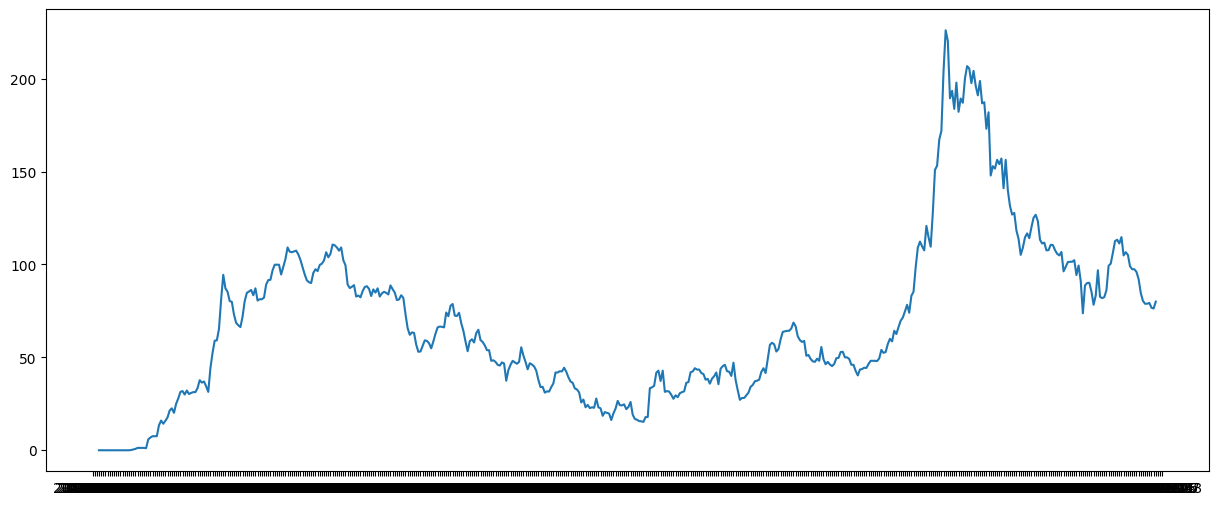

In [115]:
plt.plot(media_obitos);

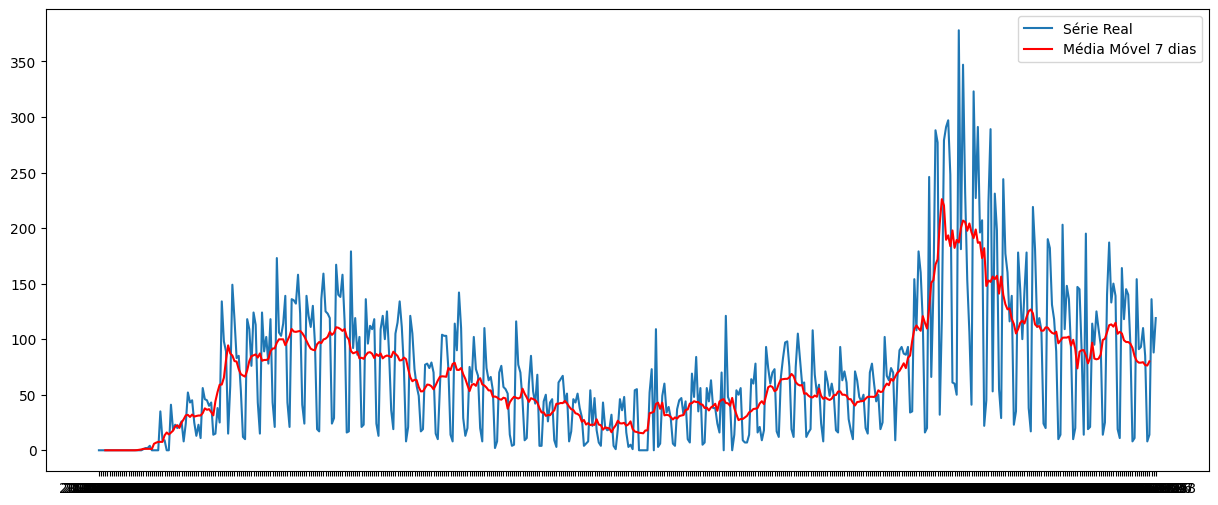

In [116]:
plt.plot(serie, label='Série Real')
plt.plot(media_obitos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

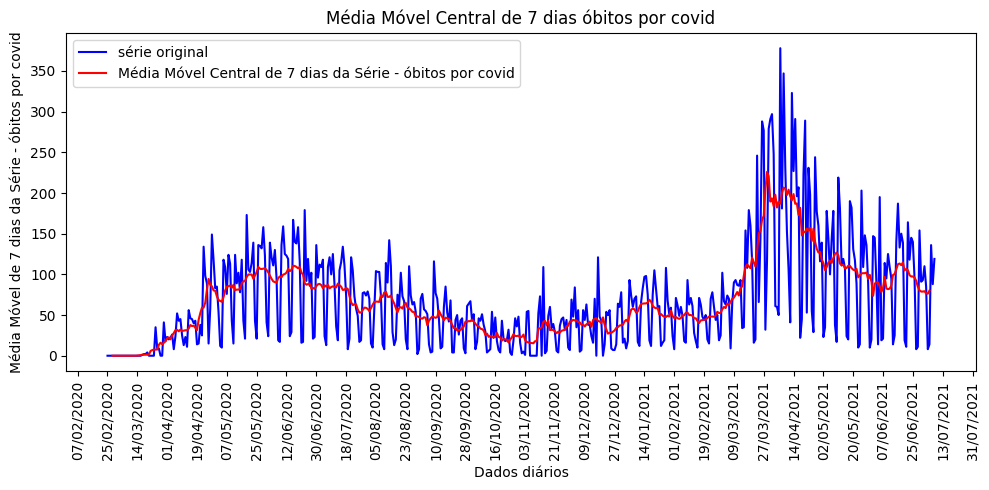

In [118]:
import matplotlib.dates as mdates



# Certificando-se de que o índice é uma série temporal (caso não esteja), formatando a data
if not pd.api.types.is_datetime64_any_dtype(serie.index):
    serie.index = pd.to_datetime(serie.index, format='%Y-%m-%d')  # Converte para ano-mês

if not pd.api.types.is_datetime64_any_dtype(media_obitos.index):
    media_obitos.index = pd.to_datetime(media_obitos.index, format='%Y-%m-%d')  # Converte para ano-mês



# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série

# série original
plt.plot(serie.index, serie.values, label='série original', color='blue')

#plt.plot(serie, label="Série")
plt.plot(media_obitos.index, media_obitos.values, label='Média Móvel Central de 7 dias da Série - óbitos por covid', color='red')




# Adicionando um título ao gráfico
plt.title("Média Móvel Central de 7 dias óbitos por covid")

# Definindo rótulos dos eixos
plt.xlabel("Dados diários")
plt.ylabel("Média Móvel de 7 dias da Série - óbitos por covid")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=90)


# Formatando o eixo x para mostrar a cada 18 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=18))  # Colocar um marcador a cada 18 dias
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Formatando para exibir ano e mês




# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()